1. Import and Understand the data 

A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. 

In [3]:
pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 5.0 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=86d3fe9b76c88386295ee271e2af487e3d0906b7ba65279d0044ec1d216eb990
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [124]:
import numpy as np
import random
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [125]:
import tflearn.datasets.oxflower17 as oxflower17
X, y = oxflower17.load_data(resize_pics=(224,224))




B. Print Number of images and shape of the images

In [126]:
print(X.shape)


(1360, 224, 224, 3)


No of Images - 1360 
Shape of Image - RGB 244*244 Pixel

C. Print count of each class from y.

In [8]:
# ANALYZE LABELS

Labels = np.unique(y)  # DISPLAY UNIQUE LABELS

NumberOfLabels = len(Labels)  # LENGTH OF UNIQUES LABELS

print('\nLabels : ', Labels)

print('\nTotal number of labels : ', NumberOfLabels)


Labels :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]

Total number of labels :  17


In [9]:
y_pd=pd.DataFrame(y)
y_pd.value_counts()

0     80
9     80
15    80
14    80
13    80
12    80
11    80
10    80
8     80
1     80
7     80
6     80
5     80
4     80
3     80
2     80
16    80
dtype: int64

2. Image Exploration & Transformation

A. Display 5 random images. 

In [127]:
import pandas as pd
dy_f = y.tolist()
df2=map(str, dy_f)  

In [128]:
df_s = []
for element in dy_f:
    df_s.append(str(element))

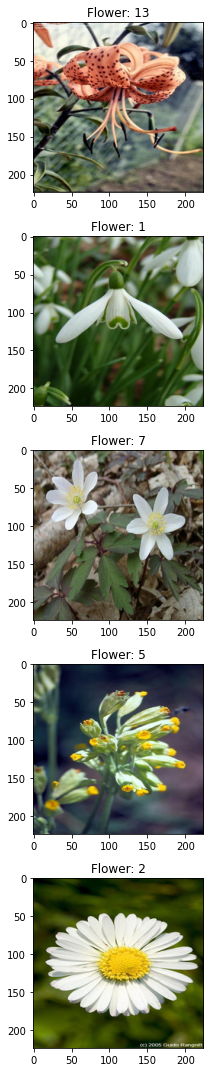

In [129]:
import random as rn
fig,ax=plt.subplots(5,1)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (1):
        l=rn.randint(0,len(y))
        ax[i].imshow(X[l])
        ax[i].set_title('Flower: '+df_s[l])
        
plt.tight_layout()

B. Select any image from the dataset and assign it to a variable

In [130]:
img_org = random.choice(X)

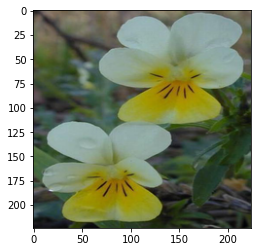

In [131]:
plt.imshow(img_org)

In [132]:
img_org.shape

(224, 224, 3)

C. Transform the image into grayscale format and display the same. 

In [133]:
gray_image = cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)

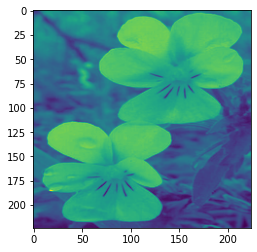

In [134]:
plt.imshow(gray_image)

D. Apply a filter to sharpen the image and display the image before and after sharpening.

In [135]:
sharp_filter = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])

sharp_img = cv2.filter2D(img_org,kernel=sharp_filter,ddepth=-1)

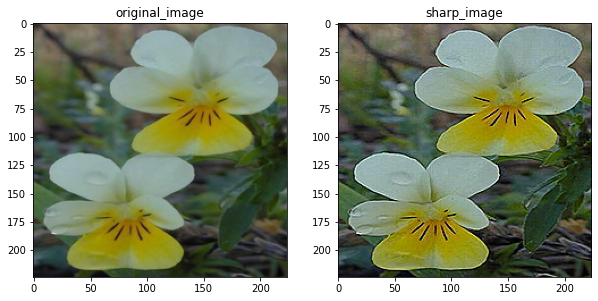

In [136]:
img_title = ['original_image', 'sharp_image']

plt.figure(figsize=(10,10))
for i,img in enumerate([img_org, sharp_img]):
    plt.subplot(1,2,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

E. Apply a filter to blur the image and display the image before and after blur. 

In [137]:
# Blur Image
blur_img = cv2.GaussianBlur(img_org,ksize=(5,5),sigmaX=0,sigmaY=0)

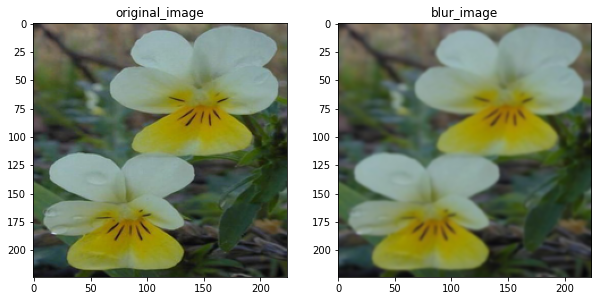

In [138]:
img_title = ['original_image', 'blur_image']

plt.figure(figsize=(10,10))
for i,img in enumerate([img_org, blur_img]):
    plt.subplot(1,2,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

F. Display all the 4 images from above questions besides each other to observe the difference. 

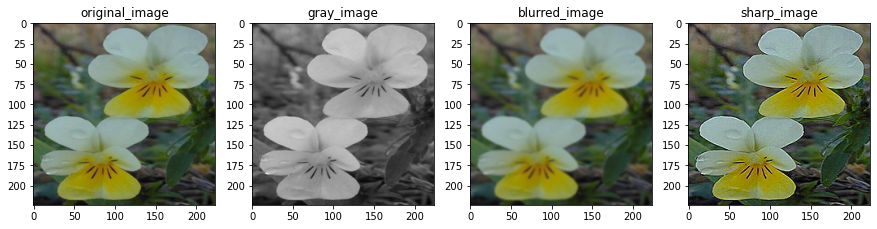

In [139]:
img_title = ['original_image', 'gray_image', 'blurred_image', 'sharp_image']

plt.figure(figsize=(15,15))
for i,img in enumerate([img_org, gray_image, blur_img, sharp_img]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

3. Model training and Tuning

A. Split the data into train and test with 80:20 proportion

In [140]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [141]:
print("X Train Shape",X_train.shape)
print("X Test Shape",X_test.shape)
print("y Train Shape",y_train.shape)
print("y Test Shape",y_train.shape)

X Train Shape (1088, 224, 224, 3)
X Test Shape (272, 224, 224, 3)
y Train Shape (1088,)
y Test Shape (1088,)


B. Train a model using any Supervised Learning algorithm and share performance metrics on test data.

In [142]:
X_train_ML = X_train.astype('float32')
X_train_ML = X_train_ML.reshape(X_train_ML.shape[0],150528)  #224*224*3
X_train_ML = X_train_ML/255
X_test_ML = X_test.astype('float32')
X_test_ML = X_test_ML.reshape(X_test_ML.shape[0], 150528)
X_teX_test_MLst = X_test_ML / 255

print('\nTraining data : ', X_train_ML.shape)  # TRAIN

print('\nTesting data : ', X_test_ML.shape) # TEST



Training data :  (1088, 150528)

Testing data :  (272, 150528)


In [143]:
print("y Train Shape",y_train.shape)
print("y Test Shape",y_test.shape)

y Train Shape (1088,)
y Test Shape (272,)


In [144]:
# Decision Tree

# Library
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# Model
model_DT=DecisionTreeClassifier(criterion='gini',
                                splitter='best',
                                max_depth=5)

model_DT.fit(X_train_ML, y_train)

# Accuracy
DT_Train=model_DT.score(X_train_ML, y_train)
DT_Test=model_DT.score(X_test_ML, y_test)

# Output
print("Train Accuracy:",DT_Train)
print("Test Accuracy:",DT_Test)

Train Accuracy: 0.43106617647058826
Test Accuracy: 0.07352941176470588


In [145]:
Comparison1 = pd.DataFrame({'Method':['Decision Tree'], 'Train accuracy': DT_Train, 
                           'Test accuracy': DT_Test})
Comparison1 = Comparison1[['Method', 'Train accuracy', 'Test accuracy']]


C. Train a model using Neural Network and share performance metrics on test data

In [146]:
y_train_NN = pd.get_dummies(y_train)
y_test_NN = pd.get_dummies(y_test)

In [147]:
print("X Train",X_train_ML.shape)
print("X Test",X_test_ML.shape)
print("Y Train",y_train_NN.shape)
print("y Train",y_test_NN.shape)

X Train (1088, 150528)
X Test (272, 150528)
Y Train (1088, 17)
y Train (272, 17)


In [148]:
### define model

import tensorflow 
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


# create model
model = Sequential()  
model.add(BatchNormalization(input_shape = (150528,)))  ### Batch_Norm Layer
    
model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(17, activation='softmax'))
    
# Compile model
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

# Fit the model
histroy = model.fit(X_train_ML, y_train_NN, validation_data=(X_test_ML, y_test_NN), epochs=30, batch_size=8, verbose=1)


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train on 1088 samples, validate on 272 samples
Epoch 1/30
1064/1088 [============================>.] - ETA: 0s - loss: 2.8354 - acc: 0.1269

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 1s 1ms/sample - loss: 2.8265 - acc: 0.1287 - val_loss: 31.1391 - val_acc: 0.1066
Epoch 2/30
1088/1088 [==============================] - 1s 1000us/sample - loss: 2.5304 - acc: 0.1590 - val_loss: 27.7973 - val_acc: 0.1949
Epoch 3/30
1088/1088 [==============================] - 1s 985us/sample - loss: 2.3020 - acc: 0.2509 - val_loss: 103.2865 - val_acc: 0.1654
Epoch 4/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 2.1508 - acc: 0.2629 - val_loss: 302.3954 - val_acc: 0.1507
Epoch 5/30
1088/1088 [==============================] - 1s 988us/sample - loss: 2.0187 - acc: 0.3162 - val_loss: 261.9241 - val_acc: 0.1875
Epoch 6/30
1088/1088 [==============================] - 1s 978us/sample - loss: 1.9389 - acc: 0.3447 - val_loss: 434.6057 - val_acc: 0.1654
Epoch 7/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 1.8584 - acc: 0.3805 - val_loss: 709.2256 - val_acc: 0.2132
Epoch 8/30
1088/1088 [================

Text(0.5, 1.0, 'Training and validation loss')

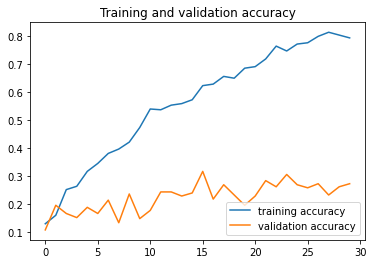

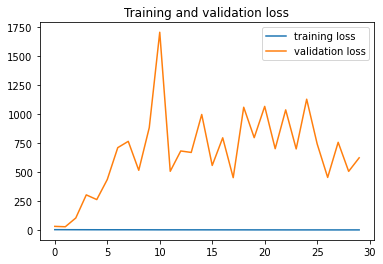

In [149]:
## Accuracy and Loss plots

accuracy      = histroy.history['acc']
val_accuracy  = histroy.history['val_acc']
loss     = histroy.history['loss']
val_loss = histroy.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [150]:
Comparison2 = pd.DataFrame({'Method':['Neural Network'], 'Train accuracy': max(accuracy), 
                           'Test accuracy': max(val_accuracy)})
Comparison2 = Comparison2[['Method', 'Train accuracy', 'Test accuracy']]

D. Train a model using a basic CNN and share performance metrics on test data. [

In [151]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True  
    )  
datagen.fit(X)

In [152]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((952, 224, 224, 3), (408, 224, 224, 3))

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [155]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(224, 224, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(17, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 220, 220, 64)      4864      
                                                                 
 batch_normalization_19 (Bat  (None, 220, 220, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 216, 216, 64)      102464    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 108, 108, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_20 (Bat  (None, 108, 108, 64)     256       
 chNormalization)                                                
                                                      

In [156]:
#Specify Loss and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [157]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/plantspecies_CNN_model1.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
#Stop fitting if there's no enhancement of accuracy for 10 times.

In [158]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=8), 
                    epochs=25, validation_data=(X_test, y_test),   
                    callbacks = [early_stopping, model_checkpoint])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 3.5109 - acc: 0.1324

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


119/119 [==============================] - 12s 84ms/step - batch: 59.0000 - size: 8.0000 - loss: 3.5109 - acc: 0.1324 - val_loss: 7.2583 - val_acc: 0.0760
Epoch 2/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 3.0509 - acc: 0.1649

119/119 [==============================] - 10s 81ms/step - batch: 59.0000 - size: 8.0000 - loss: 3.0509 - acc: 0.1649 - val_loss: 3.4255 - val_acc: 0.1814
Epoch 3/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 2.8115 - acc: 0.1880

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 2.8115 - acc: 0.1880 - val_loss: 2.0517 - val_acc: 0.2892
Epoch 4/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 2.7277 - acc: 0.2101

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 2.7277 - acc: 0.2101 - val_loss: 2.2048 - val_acc: 0.2721
Epoch 5/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 2.5293 - acc: 0.2553

119/119 [==============================] - 10s 86ms/step - batch: 59.0000 - size: 8.0000 - loss: 2.5293 - acc: 0.2553 - val_loss: 2.6148 - val_acc: 0.2157
Epoch 6/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 2.4060 - acc: 0.2658

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 2.4060 - acc: 0.2658 - val_loss: 2.7114 - val_acc: 0.2230
Epoch 7/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 2.3502 - acc: 0.2668

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 2.3502 - acc: 0.2668 - val_loss: 2.7152 - val_acc: 0.2696
Epoch 8/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 2.3132 - acc: 0.2637

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 2.3132 - acc: 0.2637 - val_loss: 2.0112 - val_acc: 0.3235
Epoch 9/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 2.1674 - acc: 0.3162

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 2.1674 - acc: 0.3162 - val_loss: 2.2312 - val_acc: 0.3627
Epoch 10/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 2.0667 - acc: 0.3267

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 2.0667 - acc: 0.3267 - val_loss: 2.4129 - val_acc: 0.3750
Epoch 11/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 2.0616 - acc: 0.3487

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 2.0616 - acc: 0.3487 - val_loss: 1.8016 - val_acc: 0.4142
Epoch 12/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 2.0060 - acc: 0.3372

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 2.0060 - acc: 0.3372 - val_loss: 2.0123 - val_acc: 0.4289
Epoch 13/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 2.0348 - acc: 0.3424

119/119 [==============================] - 10s 84ms/step - batch: 59.0000 - size: 8.0000 - loss: 2.0348 - acc: 0.3424 - val_loss: 1.5942 - val_acc: 0.4534
Epoch 14/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 1.8910 - acc: 0.3866

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 1.8910 - acc: 0.3866 - val_loss: 1.6909 - val_acc: 0.4632
Epoch 15/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 1.9015 - acc: 0.3792

119/119 [==============================] - 10s 84ms/step - batch: 59.0000 - size: 8.0000 - loss: 1.9015 - acc: 0.3792 - val_loss: 1.8426 - val_acc: 0.4559
Epoch 16/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 1.8812 - acc: 0.3950

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 1.8812 - acc: 0.3950 - val_loss: 1.9732 - val_acc: 0.3922
Epoch 17/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 1.8029 - acc: 0.3897

119/119 [==============================] - 10s 87ms/step - batch: 59.0000 - size: 8.0000 - loss: 1.8029 - acc: 0.3897 - val_loss: 1.6533 - val_acc: 0.4657
Epoch 18/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 1.8554 - acc: 0.3813

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 1.8554 - acc: 0.3813 - val_loss: 1.5525 - val_acc: 0.4632
Epoch 19/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 1.8276 - acc: 0.4044

119/119 [==============================] - 10s 86ms/step - batch: 59.0000 - size: 8.0000 - loss: 1.8276 - acc: 0.4044 - val_loss: 1.7279 - val_acc: 0.4216
Epoch 20/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 2.0289 - acc: 0.3466

119/119 [==============================] - 10s 87ms/step - batch: 59.0000 - size: 8.0000 - loss: 2.0289 - acc: 0.3466 - val_loss: 4.9933 - val_acc: 0.2132
Epoch 21/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 1.9920 - acc: 0.3477

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 1.9920 - acc: 0.3477 - val_loss: 1.7908 - val_acc: 0.4020
Epoch 22/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 1.9500 - acc: 0.3550

119/119 [==============================] - 10s 84ms/step - batch: 59.0000 - size: 8.0000 - loss: 1.9500 - acc: 0.3550 - val_loss: 1.6517 - val_acc: 0.4069
Epoch 23/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 1.8783 - acc: 0.3676

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 1.8783 - acc: 0.3676 - val_loss: 1.8495 - val_acc: 0.3897
Epoch 24/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 1.8361 - acc: 0.3792

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 1.8361 - acc: 0.3792 - val_loss: 1.4977 - val_acc: 0.4779
Epoch 25/25
119/119 [==============================] - ETA: 0s - batch: 59.0000 - size: 8.0000 - loss: 1.8046 - acc: 0.4034

119/119 [==============================] - 10s 85ms/step - batch: 59.0000 - size: 8.0000 - loss: 1.8046 - acc: 0.4034 - val_loss: 1.4972 - val_acc: 0.5000


In [159]:
#Final score and accuracy of the model
score, acc = model.evaluate(X_test,y_test)
#score1, acc1 = model.evaluate(X_train,y_train)
print('Validation score:', score,'   Validation accuracy:', acc)
#print('Train score:', score1,'   Train accuracy:',acc1)

Validation score: 1.4972252915887272    Validation accuracy: 0.5


In [160]:
Comparison3 = pd.DataFrame({'Method':['CNN Network'], 'Train accuracy': ' ', 
                           'Test accuracy': acc})
Comparison3 = Comparison3[['Method', 'Train accuracy', 'Test accuracy']]

In [161]:
classifier.save('/content/drive/My Drive/data/project2.h5')

classifier.save_weights('/content/drive/My Drive/data/projectw2.h5')

In [162]:
Comparison = pd.concat([Comparison1, Comparison2,Comparison3])


In [163]:
Comparison

,Method,Train accuracy,Test accuracy
0,Decision Tree,0.431066,0.073529
0,Neural Network,0.814338,0.316176
0,CNN Network,,0.500000


CNN Test Accuracy is very good . So we will use CNN Network for prediction

E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.

In [164]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

pretrained_model = load_model('/content/drive/My Drive/data/project2.h5')
pretrained_model.load_weights('/content/drive/My Drive/data/projectw2.h5')

In [165]:
import cv2
test_image = cv2.imread('Prediction.jpg')


In [166]:
img_predict = np.expand_dims(test_image, axis=0)
img_predict.shape

(1, 224, 224, 3)

In [167]:
cnn_predict_tl = np.argmax(model.predict(img_predict))


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [168]:
print('The predicted flower is with label:', cnn_predict_tl)


The predicted flower is with label: 12
